## Importação do Dataset

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
df= pd.read_csv("siga-empreendimentos-geracao.csv",encoding="ISO-8859-1", sep=";")

In [3]:
#método para mostrar todas as colunas e nenhuma ser omitida
pd.options.display.max_columns = None

## Análise Preliminar do Dataframe

In [4]:
# 5 primeiros elementos 
# os ultimos usa-se o tail()
df.head()

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,NomFonteCombustivel,DatEntradaOperacao,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,2023-03-17,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1953-11-20,"1400,00",1400,",00",Não,"-20,12479858","-43,87020250",2000-07-07,2030-07-07,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
1,2023-03-17,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1953-11-20,"3972,00",3972,",00",Não,"-20,13187300","-43,87693500",2000-07-07,2030-07-07,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
2,2023-03-17,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1937-01-01,"1440,00",1440,",00",Não,"-20,13754468","-43,89192620",2000-08-31,2030-08-31,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
3,2023-03-17,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,Potencial hidráulico,2008-12-25,"100000,00",100000,"45200,00",Não,"-29,06475278","-51,67494167",2001-03-15,2039-11-13,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,"Bento Gonçalves - RS, Cotiporã - RS"
4,2023-03-17,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,Potencial hidráulico,2000-10-15,"720,00",720,"510,00",Não,"-27,82377500","-52,06999722",NaN,NaN,100% para Cooperativa de Geração de Energia e ...,"72 - Uruguai, Inhanduva, Peixe e outros",Floriano Peixoto - RS


In [5]:
new_order_colunm = [ 'NomEmpreendimento','SigUFPrincipal', 'SigTipoGeracao', 
       'DscOrigemCombustivel', 'DscFonteCombustivel', 
       'NomFonteCombustivel', 'MdaPotenciaOutorgadaKw',
       'MdaPotenciaFiscalizadaKw', 'MdaGarantiaFisicaKw','DscFaseUsina','DscSubBacia',
        'DatEntradaOperacao','DatInicioVigencia','DatFimVigencia',
       'NumCoordNEmpreendimento', 'NumCoordEEmpreendimento','DscTipoOutorga',
       'DscPropriRegimePariticipacao', 'DscMuninicpios','IdeNucleoCEG','CodCEG',
       'IdcGeracaoQualificada',
       'DatGeracaoConjuntoDados']
df = df[new_order_colunm]

In [6]:
#escolha de elementos aleatorias
df.sample(3)

,NomEmpreendimento,SigUFPrincipal,SigTipoGeracao,DscOrigemCombustivel,DscFonteCombustivel,NomFonteCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,DscFaseUsina,DscSubBacia,DatEntradaOperacao,DatInicioVigencia,DatFimVigencia,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DscTipoOutorga,DscPropriRegimePariticipacao,DscMuninicpios,IdeNucleoCEG,CodCEG,IdcGeracaoQualificada,DatGeracaoConjuntoDados
994,Latasa Santa Cruz,RJ,UTE,Fóssil,Petróleo,Óleo Diesel,"4480,00",4480,",00",Operação,NaN,2005-02-01,NaN,NaN,"-22,87665194","-43,22787500",Registro,100% para Rexam Beverage Can South América S.A...,Rio de Janeiro - RJ,28425,UTE.PE.RJ.028425-4.1,Não,2023-03-17
7939,Angelino Jose Alvares,PA,UFV,Solar,Radiação solar,Radiação solar,"1,00",1,",00",Operação,NaN,2018-03-17,NaN,NaN,"-2,07350000","-52,26077000",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Porto de Moz - PA,40362,UFV.RS.PA.040362-8.1,NaN,2023-03-17
3859,GUARANIPLAST,MG,UTE,Fóssil,Petróleo,Óleo Diesel,"760,00",760,",00",Operação,NaN,2014-09-30,NaN,NaN,"-21,18180559","-42,60622193",Registro,100% para Guaraniplast Industria de Embalagens...,Miraí - MG,32785,UTE.PE.MG.032785-9.1,Não,2023-03-17


In [7]:
df.shape

(24600, 23)

In [8]:
print(df.columns)

Index(['NomEmpreendimento', 'SigUFPrincipal', 'SigTipoGeracao',
       'DscOrigemCombustivel', 'DscFonteCombustivel', 'NomFonteCombustivel',
       'MdaPotenciaOutorgadaKw', 'MdaPotenciaFiscalizadaKw',
       'MdaGarantiaFisicaKw', 'DscFaseUsina', 'DscSubBacia',
       'DatEntradaOperacao', 'DatInicioVigencia', 'DatFimVigencia',
       'NumCoordNEmpreendimento', 'NumCoordEEmpreendimento', 'DscTipoOutorga',
       'DscPropriRegimePariticipacao', 'DscMuninicpios', 'IdeNucleoCEG',
       'CodCEG', 'IdcGeracaoQualificada', 'DatGeracaoConjuntoDados'],
      dtype='object')


In [9]:
print(df['NomFonteCombustivel'].unique())

['Potencial hidráulico' 'Gás de Alto Forno - CM' 'Óleo Diesel'
 'Bagaço de Cana de Açúcar' 'Gás Natural' 'Urânio' 'Licor Negro'
 'Óleo Combustível' 'Calor de Processo - CM'
 'Outros Energéticos de Petróleo' 'Carvão Mineral' 'Resíduos Florestais'
 'Calor de Processo - GN' 'Gás de Refinaria' 'Biogás - RU'
 'Cinética do vento' 'Lenha' 'Casca de Arroz' 'Radiação solar'
 'Carvão Vegetal' 'Gás de Alto Forno - PE' 'Gás de Alto Forno - Biomassa'
 'Calor de Processo - OF' 'Biogás - RA' 'Capim Elefante' 'Óleos vegetais'
 'Biogás-AGR' 'Resíduos Sólidos Urbanos - RU' 'Biogás - Floresta' 'Etanol'
 'Carvão - RU']


In [10]:
if isinstance(df.index, pd.DatetimeIndex):
    print("A série é uma série temporal")
else:
    print("A série não é uma série temporal")

A série não é uma série temporal


In [11]:
print(df['DatGeracaoConjuntoDados'].unique())

['2023-03-17']


In [12]:
df['SigUFPrincipal'].nunique()

27

In [13]:
df['SigUFPrincipal'].unique()

array(['MG', 'RS', 'SC', 'TO', 'RR', 'MT', 'SP', 'ES', 'RO', 'AM', 'RJ',
       'PR', 'CE', 'BA', 'MA', 'PI', 'AL', 'GO', 'PB', 'AP', 'MS', 'PE',
       'PA', 'DF', 'SE', 'RN', 'AC'], dtype=object)

In [14]:
df['DscMuninicpios'].nunique()

2082

In [15]:
maior_pot = df['MdaPotenciaFiscalizadaKw'].idxmax()
print(df.loc[maior_pot])

NomEmpreendimento                                         Belo Monte
SigUFPrincipal                                                    PA
SigTipoGeracao                                                   UHE
DscOrigemCombustivel                                         Hídrica
DscFonteCombustivel                             Potencial hidráulico
NomFonteCombustivel                             Potencial hidráulico
MdaPotenciaOutorgadaKw                                   11233100,00
MdaPotenciaFiscalizadaKw                                    11233100
MdaGarantiaFisicaKw                                       4418900,00
DscFaseUsina                                                Operação
DscSubBacia                                        18 - Xingu e Paru
DatEntradaOperacao                                        2016-04-20
DatInicioVigencia                                         2010-08-26
DatFimVigencia                                            2045-08-26
NumCoordNEmpreendimento           

In [16]:
df.describe()

,MdaPotenciaFiscalizadaKw,IdeNucleoCEG
count,2.460000e+04,24600.000000
mean,7.772909e+03,50677.506260
std,1.233062e+05,15558.503032
min,0.000000e+00,8.000000
25%,1.000000e+00,38558.750000
50%,1.000000e+00,55102.500000
75%,1.000000e+00,63896.250000
max,1.123310e+07,71936.000000


In [17]:
df.dtypes

NomEmpreendimento               object
SigUFPrincipal                  object
SigTipoGeracao                  object
DscOrigemCombustivel            object
DscFonteCombustivel             object
NomFonteCombustivel             object
MdaPotenciaOutorgadaKw          object
MdaPotenciaFiscalizadaKw         int64
MdaGarantiaFisicaKw             object
DscFaseUsina                    object
DscSubBacia                     object
DatEntradaOperacao              object
DatInicioVigencia               object
DatFimVigencia                  object
NumCoordNEmpreendimento         object
NumCoordEEmpreendimento         object
DscTipoOutorga                  object
DscPropriRegimePariticipacao    object
DscMuninicpios                  object
IdeNucleoCEG                     int64
CodCEG                          object
IdcGeracaoQualificada           object
DatGeracaoConjuntoDados         object
dtype: object

## Data Cleaning

### Transformando os tipos de dados

In [18]:
df['MdaPotenciaFiscalizadaKw'] = df['MdaPotenciaFiscalizadaKw'].astype(float)

In [19]:
df['MdaPotenciaOutorgadaKw'] = df['MdaPotenciaOutorgadaKw'].str.replace(',', '.')
df['MdaPotenciaOutorgadaKw'] = df['MdaPotenciaOutorgadaKw'].astype(float)

In [20]:
df['MdaGarantiaFisicaKw'] = df['MdaGarantiaFisicaKw'].str.replace(',00', '.00')
df['MdaGarantiaFisicaKw'] = df['MdaGarantiaFisicaKw'].astype(float)

In [21]:
df['DatEntradaOperacao'] = pd.to_datetime(df['DatEntradaOperacao'], format='%Y/%m/%d')
df['DatInicioVigencia'] = pd.to_datetime(df['DatInicioVigencia'], format='%Y/%m/%d')
df['DatFimVigencia'] = pd.to_datetime(df['DatFimVigencia'], format='%Y/%m/%d')

In [22]:
df.dtypes

NomEmpreendimento                       object
SigUFPrincipal                          object
SigTipoGeracao                          object
DscOrigemCombustivel                    object
DscFonteCombustivel                     object
NomFonteCombustivel                     object
MdaPotenciaOutorgadaKw                 float64
MdaPotenciaFiscalizadaKw               float64
MdaGarantiaFisicaKw                    float64
DscFaseUsina                            object
DscSubBacia                             object
DatEntradaOperacao              datetime64[ns]
DatInicioVigencia               datetime64[ns]
DatFimVigencia                  datetime64[ns]
NumCoordNEmpreendimento                 object
NumCoordEEmpreendimento                 object
DscTipoOutorga                          object
DscPropriRegimePariticipacao            object
DscMuninicpios                          object
IdeNucleoCEG                             int64
CodCEG                                  object
IdcGeracaoQua

### Dados Nulos

In [23]:
print('Quantidade de dados nulos: ', df.isna().sum().sum())

Quantidade de dados nulos:  77806


In [24]:
#isnull() e isna() são equivalentes, ambas retornam boleanos para valores nulos (NaN - not a number) 
#sum() contabiliza os nulos
df.isnull().sum()

NomEmpreendimento                   0
SigUFPrincipal                      0
SigTipoGeracao                      0
DscOrigemCombustivel                0
DscFonteCombustivel                 0
NomFonteCombustivel                 0
MdaPotenciaOutorgadaKw              0
MdaPotenciaFiscalizadaKw            0
MdaGarantiaFisicaKw                 0
DscFaseUsina                        0
DscSubBacia                     23126
DatEntradaOperacao                  0
DatInicioVigencia               19317
DatFimVigencia                  19327
NumCoordNEmpreendimento             0
NumCoordEEmpreendimento             0
DscTipoOutorga                      0
DscPropriRegimePariticipacao        0
DscMuninicpios                      0
IdeNucleoCEG                        0
CodCEG                              0
IdcGeracaoQualificada           16036
DatGeracaoConjuntoDados             0
dtype: int64

In [25]:
df['IdcGeracaoQualificada'].unique()

array(['Não', 'Sim', nan], dtype=object)

In [26]:
df['DatInicioVigencia'].unique()

array(['2000-07-07T00:00:00.000000000', '2000-08-31T00:00:00.000000000',
       '2001-03-15T00:00:00.000000000', ...,
       '2022-11-22T00:00:00.000000000', '2022-12-05T00:00:00.000000000',
       '2023-03-08T00:00:00.000000000'], dtype='datetime64[ns]')

In [27]:
#usando metodo loc para subistituir NaN por valores padrões; Foi escolhido valores similiares ao tipo de dados.
df.loc[df['IdcGeracaoQualificada'].isnull(),'IdcGeracaoQualificada']= 'Other'
df.loc[df['DatInicioVigencia'].isnull(),'DatInicioVigencia']= '2023-01-01'
df.loc[df['DatFimVigencia'].isnull(),'DatFimVigencia']= '2023-01-01'
df.loc[df['DscSubBacia'].isnull(),'DscSubBacia']= '00 - sem identificacao'

In [39]:
#pode-se ver que foi substituido os NaN por valores padrões
df.sample(13)

,NomEmpreendimento,SigUFPrincipal,SigTipoGeracao,DscOrigemCombustivel,DscFonteCombustivel,NomFonteCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,DscFaseUsina,DscSubBacia,DatEntradaOperacao,DatInicioVigencia,DatFimVigencia,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DscTipoOutorga,DscPropriRegimePariticipacao,DscMuninicpios,IdeNucleoCEG,CodCEG,IdcGeracaoQualificada,DatGeracaoConjuntoDados
11928,Rouxinol 1,GO,UFV,Solar,Radiação solar,Radiação solar,30000.00,0.0,0.0,Construção não iniciada,00 - sem identificacao,1900-01-03,2022-09-21,2057-09-21,"-14,55022500","-49,11105000",Autorização,100% para Infinity Solar Energia Ltda. (PIE),Uruaçu - GO,52026,UFV.RS.GO.052026-8.1,Não,2023-03-17
10526,Sky Arinos XI,MG,UFV,Solar,Radiação solar,Radiação solar,50000.00,0.0,0.0,Construção não iniciada,00 - sem identificacao,1900-01-03,2022-01-31,2057-01-31,"-15,85949800","-45,94031000",Autorização,100% para Thalassius A038.21 Participações S.A...,Arinos - MG,47374,UFV.RS.MG.047374-0.1,Não,2023-03-17
8521,Paranaiba 8,MS,UFV,Solar,Radiação solar,Radiação solar,50000.00,0.0,0.0,Construção não iniciada,00 - sem identificacao,1900-01-03,2021-05-28,2056-05-28,"-19,67246944","-51,37592778",Autorização,100% para Paranaíba I Projetos de Energia Sola...,Paranaíba - MS,43187,UFV.RS.MS.043187-7.1,Não,2023-03-17
9009,Jose Agamenon Teixeira Nunes,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.0,0.0,Operação,00 - sem identificacao,2019-08-22,2023-01-01,2023-01-01,"-3,74123500","-49,82684700",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Tucuruí - PA,45351,UFV.RS.PA.045351-0.1,Other,2023-03-17
23168,10123,MS,UFV,Solar,Radiação solar,Radiação solar,1.38,1.0,0.0,Operação,00 - sem identificacao,2022-09-19,2023-01-01,2023-01-01,"-19,67011000","-57,89560000",Registro,100% para ENERGISA MATO GROSSO DO SUL - DISTRI...,Corumbá - MS,70337,UFV.RS.MS.070337-0.1,Other,2023-03-17
730,Diana,SP,UTE,Biomassa,Agroindustriais,Bagaço de Cana de Açúcar,6000.00,6000.0,0.0,Operação,00 - sem identificacao,2000-06-28,2015-07-27,2045-07-27,"-21,40130021","-49,89350002",Autorização,100% para DIANA BIOENERGIA AVANHANDAVA SA (APE),Avanhandava - SP,27890,UTE.AI.SP.027890-4.1,Não,2023-03-17
20783,Marizete Andrade de Souza,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.0,0.0,Operação,00 - sem identificacao,2022-06-08,2023-01-01,2023-01-01,"-1,55429000","-50,28675700",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Curralinho - PA,66352,UFV.RS.PA.066352-2.1,Other,2023-03-17
7048,Pedro Correa da Silva,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.0,0.0,Operação,00 - sem identificacao,2018-03-06,2023-01-01,2023-01-01,"-2,05202000","-52,37432000",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Porto de Moz - PA,39459,UFV.RS.PA.039459-9.1,Other,2023-03-17
21871,Doca Alves Dos Santos,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.0,0.0,Operação,00 - sem identificacao,2022-07-13,2023-01-01,2023-01-01,"-1,66027300","-50,70190100",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Melgaço - PA,67479,UFV.RS.PA.067479-6.1,Other,2023-03-17
6644,Robson da Silva Pinheiro,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.0,0.0,Operação,00 - sem identificacao,2017-12-04,2023-01-01,2023-01-01,"-1,79609998","-52,34682996",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Porto de Moz - PA,39054,UFV.RS.PA.039054-2.1,Other,2023-03-17


In [29]:
#sem dados nulos
df.isnull().sum()

NomEmpreendimento               0
SigUFPrincipal                  0
SigTipoGeracao                  0
DscOrigemCombustivel            0
DscFonteCombustivel             0
NomFonteCombustivel             0
MdaPotenciaOutorgadaKw          0
MdaPotenciaFiscalizadaKw        0
MdaGarantiaFisicaKw             0
DscFaseUsina                    0
DscSubBacia                     0
DatEntradaOperacao              0
DatInicioVigencia               0
DatFimVigencia                  0
NumCoordNEmpreendimento         0
NumCoordEEmpreendimento         0
DscTipoOutorga                  0
DscPropriRegimePariticipacao    0
DscMuninicpios                  0
IdeNucleoCEG                    0
CodCEG                          0
IdcGeracaoQualificada           0
DatGeracaoConjuntoDados         0
dtype: int64

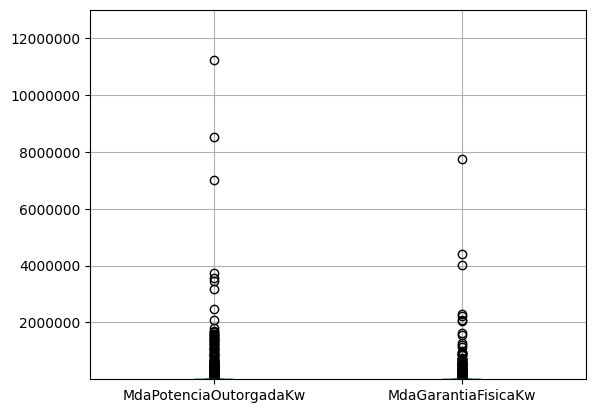

In [30]:
#outlier
ax = df.boxplot(column=['MdaPotenciaOutorgadaKw','MdaGarantiaFisicaKw'])
ax.set_ylim(1, 13000000)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
ax=plt.show

In [31]:
df[(df['NomEmpreendimento'] == 'Itaipu (Parte Brasileira)') | (df['NomEmpreendimento'] == 'Belo Monte')]

,NomEmpreendimento,SigUFPrincipal,SigTipoGeracao,DscOrigemCombustivel,DscFonteCombustivel,NomFonteCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,DscFaseUsina,DscSubBacia,DatEntradaOperacao,DatInicioVigencia,DatFimVigencia,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DscTipoOutorga,DscPropriRegimePariticipacao,DscMuninicpios,IdeNucleoCEG,CodCEG,IdcGeracaoQualificada,DatGeracaoConjuntoDados
211,Itaipu (Parte Brasileira),PR,UHE,Hídrica,Potencial hidráulico,Potencial hidráulico,7000000.0,7000000.0,7750800.0,Operação,"64 - Parana, Paranapanema, Amambai e outros",1989-04-01,1973-08-30,2023-08-30,"-25,40831282","-54,58741668",Concessão,100% para Itaipu Binacional (SP),Foz do Iguaçu - PR,1161,UHE.PH.PR.001161-4.1,Não,2023-03-17
2398,Belo Monte,PA,UHE,Hídrica,Potencial hidráulico,Potencial hidráulico,11233100.0,11233100.0,4418900.0,Operação,18 - Xingu e Paru,2016-04-20,2010-08-26,2045-08-26,"-3,12638900","-51,77500000",Concessão,100% para NORTE ENERGIA S/A (PIE),"Altamira - PA, Vitória do Xingu - PA",30354,UHE.PH.PA.030354-2.1,Não,2023-03-17


In [32]:
#tipos de dados
df.dtypes

NomEmpreendimento                       object
SigUFPrincipal                          object
SigTipoGeracao                          object
DscOrigemCombustivel                    object
DscFonteCombustivel                     object
NomFonteCombustivel                     object
MdaPotenciaOutorgadaKw                 float64
MdaPotenciaFiscalizadaKw               float64
MdaGarantiaFisicaKw                    float64
DscFaseUsina                            object
DscSubBacia                             object
DatEntradaOperacao              datetime64[ns]
DatInicioVigencia               datetime64[ns]
DatFimVigencia                  datetime64[ns]
NumCoordNEmpreendimento                 object
NumCoordEEmpreendimento                 object
DscTipoOutorga                          object
DscPropriRegimePariticipacao            object
DscMuninicpios                          object
IdeNucleoCEG                             int64
CodCEG                                  object
IdcGeracaoQua

## Entendendo as Potencias

In [33]:
df['IdeNucleoCEG'].nunique()

24598

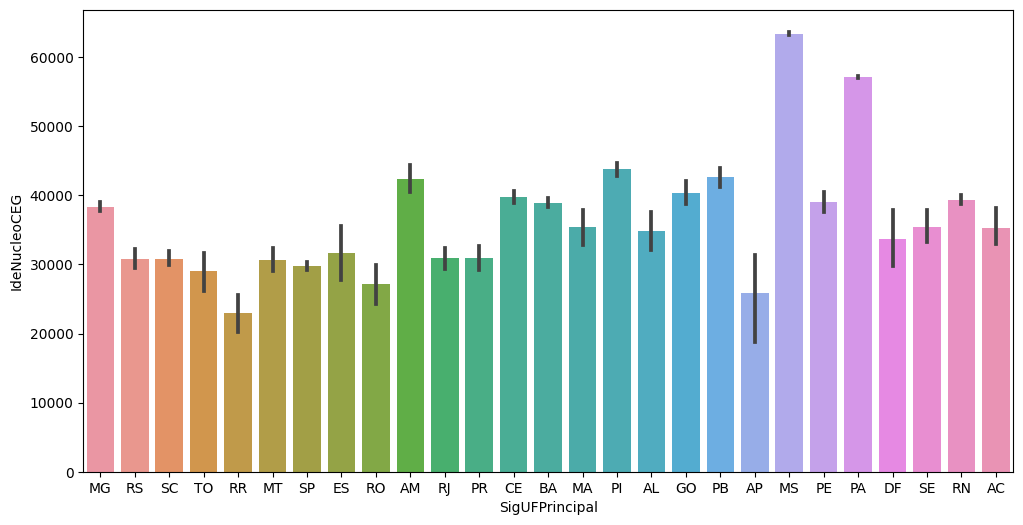

In [34]:
ax = sns.barplot(x='SigUFPrincipal', y='IdeNucleoCEG', data=df)
ax.figure.set_size_inches(12,6)

In [35]:
(df[df['MdaPotenciaFiscalizadaKw'] <= 10])['MdaPotenciaFiscalizadaKw'].count()

18899

In [36]:
df['DscMuninicpios'].value_counts(ascending=False)

Portel - PA              5708
Corumbá - MS             2865
Porto de Moz - PA        2289
Curralinho - PA          2210
Tucuruí - PA             1394
                         ... 
Presidente Alves - SP       1
Minas do Leão - RS          1
Avanhandava - SP            1
Orindiúva - SP              1
Cariacica - ES              1
Name: DscMuninicpios, Length: 2082, dtype: int64

In [37]:
pot_estado = df.groupby('SigUFPrincipal')['MdaPotenciaFiscalizadaKw'].sum()
df_pot_estado = pd.DataFrame({'estado': pot_estado.index, 'potencia_total': pot_estado.values})
df_pot_estado.head()


,estado,potencia_total
0,AC,142883.0
1,AL,782801.0
2,AM,2086461.0
3,AP,973705.0
4,BA,15975508.0


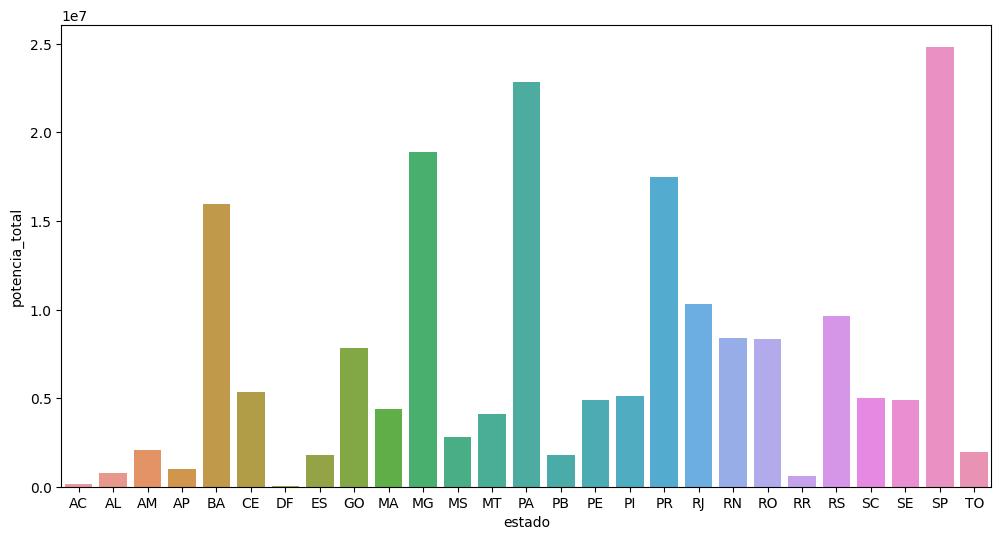

In [38]:
ax2 = sns.barplot(x='estado', y='potencia_total', data = df_pot_estado)
ax2.figure.set_size_inches(12,6)

## Entendendo os Tipos de Energia